# Processing Data
## Làm sạch dữ liệu

In [662]:
import pandas as pd
df = pd.read_csv('Tiki_Comments.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55951 entries, 0 to 55950
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             55951 non-null  int64 
 1   title          55951 non-null  object
 2   content        23882 non-null  object
 3   thank_count    55951 non-null  int64 
 4   customer_id    55951 non-null  int64 
 5   rating         55951 non-null  int64 
 6   customer_name  55884 non-null  object
 7   created_at     55951 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.4+ MB


In [664]:
!pip install deep-translator


## Loại bỏ các cột không cần thiết và xử lý giá trị null, duplicates

In [666]:
# Xoá dữ liệu trùng lặp theo customer_id + content (nếu có)
subset_cols = [col for col in ['customer_id', 'content'] if col in df.columns]
df = df.drop_duplicates(subset=subset_cols, keep='first')
# Xoá các cột không cần thiết (an toàn, không lỗi nếu cột không tồn tại)
df = df.drop(columns=['id', 'thank_count', 'customer_name', 'customer_id', 'created_at'], errors='ignore')
# Xoá những dòng bị thiếu ở cột 'content'
if 'content' in df.columns:
    df = df.dropna(subset=['content'])
# Kiểm tra lại
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23385 entries, 0 to 55950
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23385 non-null  object
 1   content  23385 non-null  object
 2   rating   23385 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 730.8+ KB


## Load các danh sách emoji, stopword, từ viết tắt để chuẩn bị clean data


In [668]:
import re

#Danh sách emoji cần xóa
emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # Mặt cười, cảm xúc
        u"\U0001F300-\U0001F5FF"  # Biểu tượng thiên nhiên, đối tượng
        u"\U0001F680-\U0001F6FF"  # Biểu tượng giao thông
        u"\U0001F1E0-\U0001F1FF"  # Cờ quốc gia
        u"\U00002702-\U000027B0"  # Ký hiệu dạng hình
        u"\U000024C2-\U0001F251"  # Ký hiệu đóng khung
        u"\U0001F926-\U0001F937"  # Hành động, cử chỉ
        u"\U00010000-\U0010FFFF" # Các ký tự bổ sung
        u"\u200d"                 # Nối ký tự (zero width joiner)
        u"\u2640-\u2642"          # Ký hiệu giới tính
        u"\u2600-\u2B55"          # Biểu tượng đa dạng khác
        u"\u23cf"                 # Biểu tượng đẩy đĩa
        u"\u23e9"                 # Tua nhanh
        u"\u231a"                 # Đồng hồ
        u"\u3030"                 # Dấu ngoằn ngoèo
        u"\ufe0f"                 # Bộ chọn kiểu hiển thị
        "]+", flags=re.UNICODE
)
#Load danh sách các stop word
vietnamese_stopwords = set(open('vietnamese-stopwords.txt', encoding='utf-8').read().splitlines())

#Load danh sách các từ viết tắt hay sử dụng
short_word_dict = {
    "ko": "không",
    "kg": "không",
    "khong": "không",
    "k": "không",
    "kh": "không",
    "hông": "không",
    "cx": "cũng",
    "mik": "mình",
    "mn": "mọi người",
    "bth": "bình thường",
    "nv": "nhân viên",
    "sp": "sản phẩm",
    "đc": "được",
    "dc": "được",
    "đk": "điều khoản",
    "đk": "điều khiện",
    "đt": "điện thoại",
    "j": "gì",
    "vs": "với",
    "hok": "không",
    "lun": "luôn",
    "z": "vậy",
    "zậy": "gì vậy",
    "thik": "thích",
    "hum": "hôm",
    "wa": "qua",
    "m": "mình",
    "mk": "mình",
    "bn": "bạn",
    "ok": "ổn",
    "nx": "nữa",
    "oke": "tốt",
    "oki": "tốt",
    "xs": "xuất sắc",
    "cs": "có",
    "th": "thôi",
    "bk": "biết",
    "tr": "trời",
    "ns": "nói",
    "h": "giờ",
    "ms": "mới",
    "r": "rồi",
    "s": "sao",
    "t": "tôi",
    "vde": "vấn đề",
    "dui": "vui",
    "dth": "dễ thương"
}



In [670]:
!pip install maturin


In [672]:
!{sys.executable} -m pip install --upgrade pip setuptools wheel maturin
!{sys.executable} -m pip install underthesea


In [674]:
pip install underthesea==6.5.0


Note: you may need to restart the kernel to use updated packages.


In [676]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


## Phân tích độ phổ biến của các stopwords trong tiếng Việt

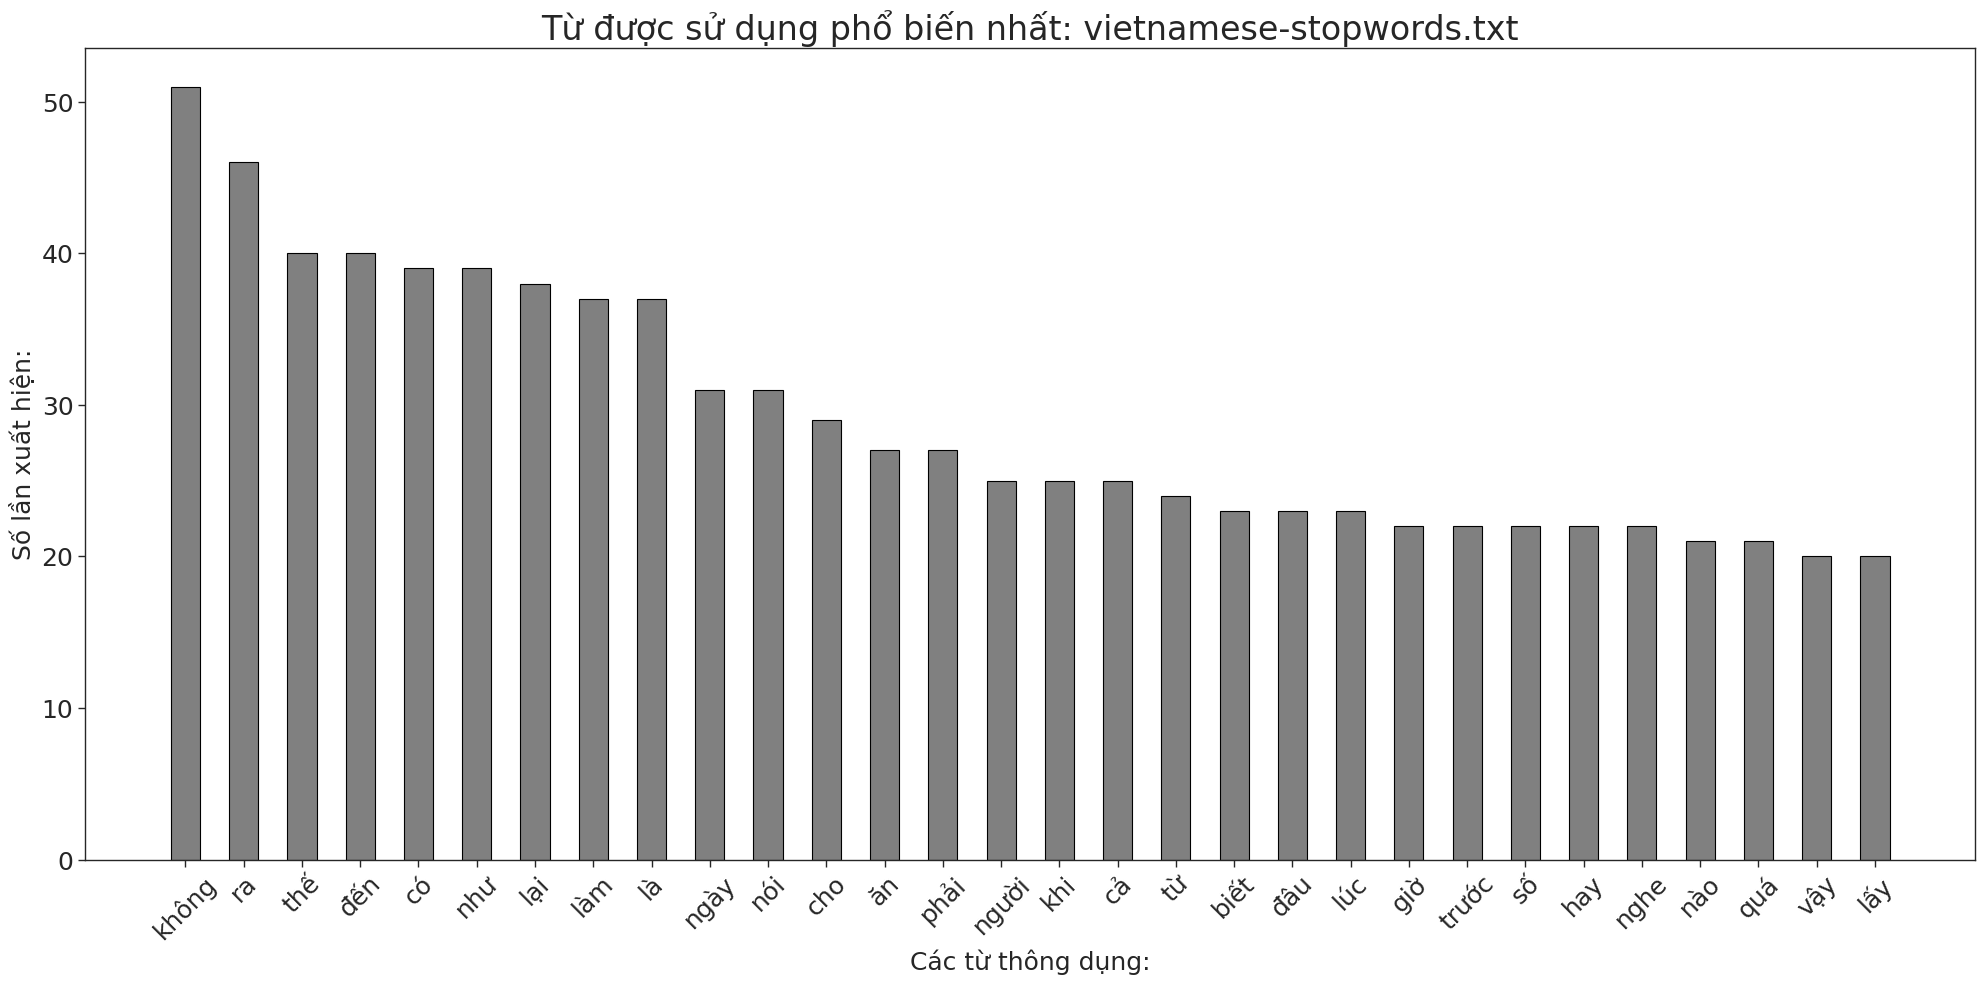

In [678]:
import matplotlib.pyplot as plt
from collections import Counter

def plotWordFrequency(vietnamese_file):
    # Đọc file stopword
    with open(vietnamese_file, 'r', encoding='utf-8') as f:
        words = f.read().split()
    
    # Đếm số lần xuất hiện, lấy 40 từ phổ biến nhất
    counter = Counter(words)
    data = counter.most_common(30)

    most_words = [x[0] for x in data]
    times_used = [x[1] for x in data]

    # Vẽ biểu đồ
    plt.figure(figsize=(20, 10))
    plt.bar(most_words, times_used, color='grey', edgecolor='black', width=0.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Các từ thông dụng:', fontsize=18)
    plt.ylabel('Số lần xuất hiện:', fontsize=18)
    plt.title(f'Từ được sử dụng phổ biến nhất: {vietnamese_file.split("/")[-1]}', fontsize=24)
    plt.tight_layout()
    plt.show()

# Gọi hàm
plotWordFrequency('vietnamese-stopwords.txt')


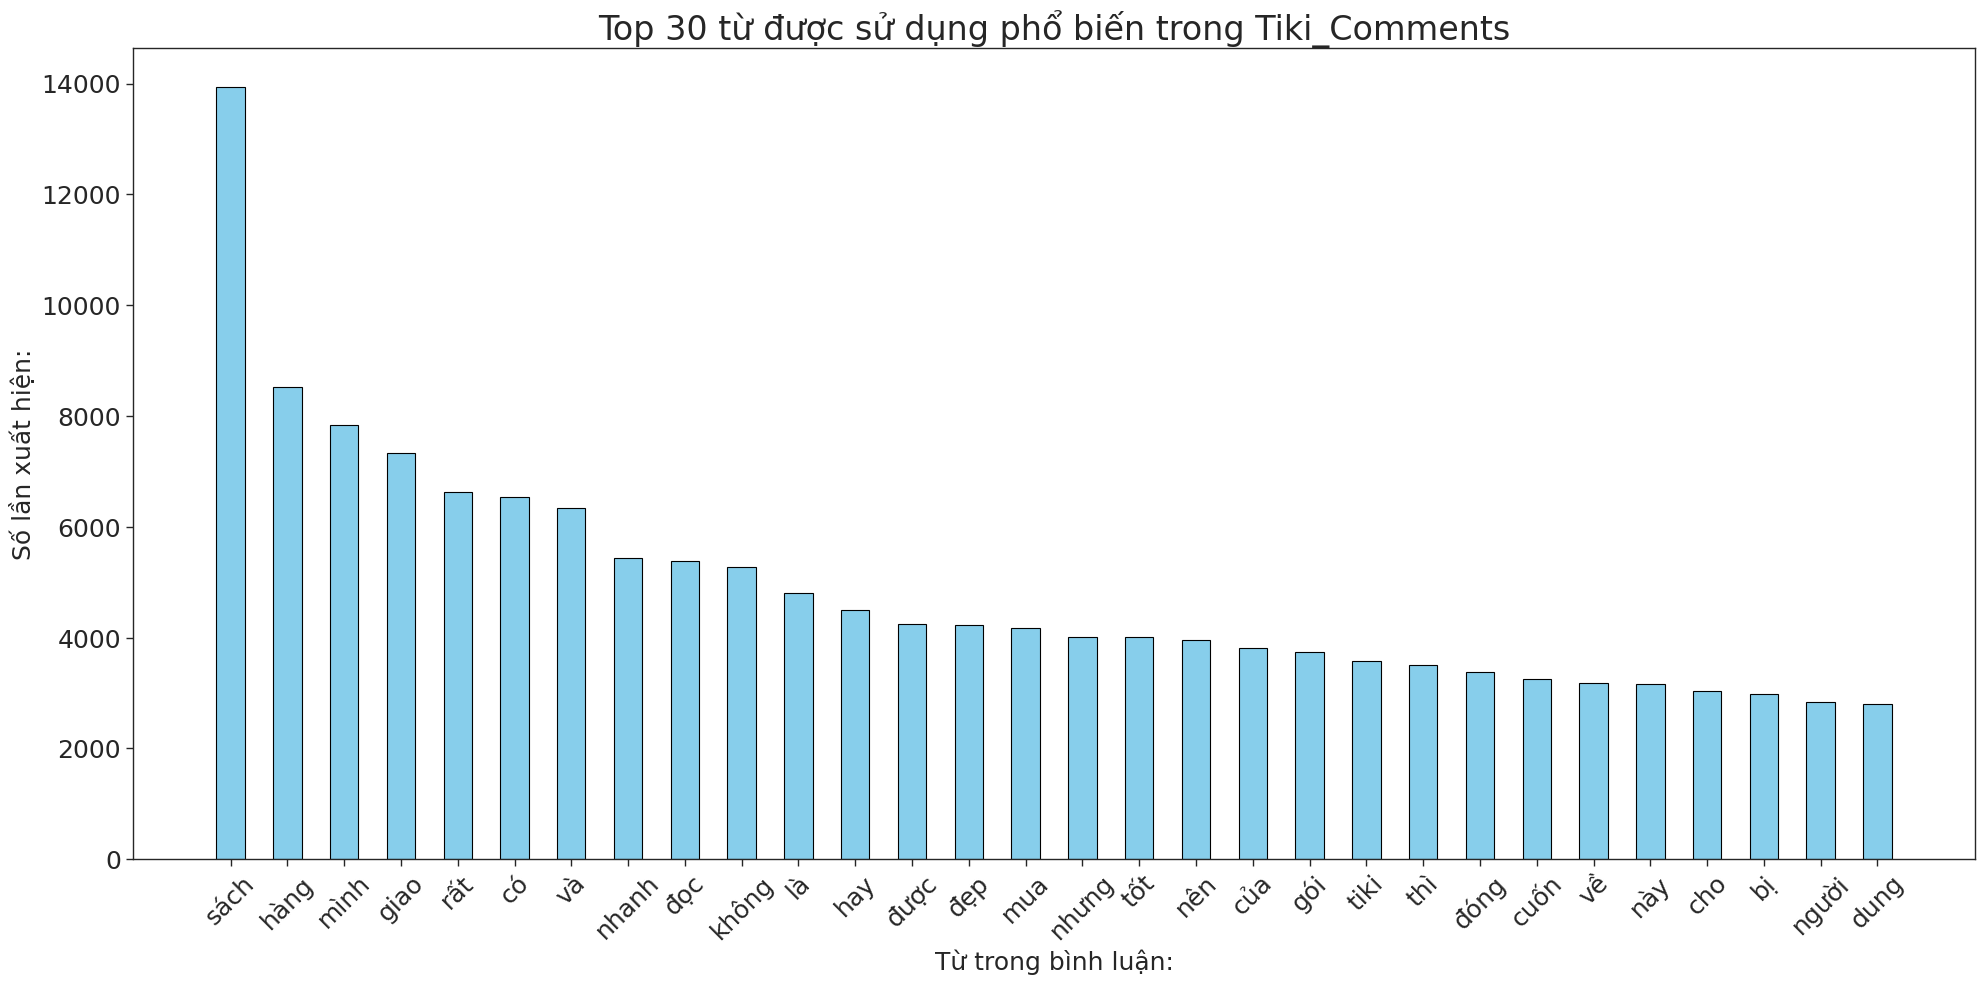

In [680]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import re

def plotWordFrequencyFromComments(csv_file, top_n=30):
    # Đọc dữ liệu bình luận
    df = pd.read_csv(csv_file)
    
    # Gom toàn bộ nội dung bình luận thành một danh sách từ
    all_words = []
    for text in df['content'].dropna():   # bỏ dòng bị NaN
        # Đưa về chữ thường
        text = str(text).lower()
        # Loại bỏ ký tự đặc biệt, chỉ giữ chữ cái và khoảng trắng
        text = re.sub(r'[^a-zA-ZÀ-ỹ\s]', ' ', text)
        # Tách từ
        words = text.split()
        all_words.extend(words)
    
    # Đếm tần suất
    counter = Counter(all_words)
    data = counter.most_common(top_n)

    most_words = [x[0] for x in data]
    times_used = [x[1] for x in data]

    # Vẽ biểu đồ
    plt.figure(figsize=(20, 10))
    plt.bar(most_words, times_used, color='skyblue', edgecolor='black', width=0.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Từ trong bình luận:', fontsize=18)
    plt.ylabel('Số lần xuất hiện:', fontsize=18)
    plt.title(f'Top {top_n} từ được sử dụng phổ biến trong Tiki_Comments', fontsize=24)
    plt.tight_layout()
    plt.show()

# Gọi hàm
plotWordFrequencyFromComments('Tiki_Comments.csv', top_n=30)


In [682]:
from underthesea import word_tokenize, text_normalize
import re

prefix_words = {
    # --- Phủ định ---
    "không", "chưa", "chẳng", "chả", "đâu", "khó",
    "chả_hề", "chẳng_hề", "không_hề", "chưa_hề",
    "chẳng_bao_giờ", "không_bao_giờ",

    # --- Tăng cường ---
    "siêu", "cực", "rất", "quá", "khá", "hơi", "thật",
    "hết_sức", "cực_kỳ", "cực_kì", "vô_cùng",
    "khủng_khiếp", "cực_đỉnh", "siêu_cấp",
    "rất_chi", "quá_đỗi", "cực_thích",

    # --- Trạng thái / mức độ ---
    "bị", "mới", "cũ", "to", "nhỏ", "nặng", "nhẹ",
    "cao", "thấp", "ổn", "tạm", "gần", "xa",
    "già", "trẻ", "kém", "xịn", "dở",
    "xấu", "tốt", "chậm", "nhanh"
}


def clean_data(text):
    if not isinstance(text, str) or text.strip() == "":
        return ""
    text = text.lower()
    text = re.sub(r'(.)\1{2,}', r'\1', text)  # rút gọn ký tự lặp
    text = emoji_pattern.sub(r'', text)       # xóa emoji
    text = re.sub(r'[^\w\s]', ' ', text)      # xóa ký tự đặc biệt
    text = text_normalize(text)

    # Chuẩn hóa viết tắt
    words = text.split()
    words = [short_word_dict.get(w, w) for w in words]
    text = ' '.join(words)

    # --- Tách từ ---
    tokens = word_tokenize(text)

    # --- Ghép prefix (phủ định/tăng cường) ---
    merged_tokens = []
    skip = False
    for i, w in enumerate(tokens):
        if skip:
            skip = False
            continue
        if w in prefix_words and i+1 < len(tokens):
            merged_tokens.append(w + "_" + tokens[i+1])
            skip = True
        else:
            merged_tokens.append(w)

    return " ".join(merged_tokens)


# Test
print(clean_data("Sản phẩm chưa tốt, dịch vụ chưa chu đáo."))
print(clean_data("Mình đã hơi ẩu khi mua cuốn này"))
print(clean_data("Điện thoại rất bền, pin khá ổn định."))
print(clean_data("Dịch vụ ko tốt, bảo hành k rõ ràng."))
print(clean_data(" bọc rất kĩ in ấn đẹp bìa xinh xỉu"))



sản phẩm chưa_tốt dịch vụ chưa_chu đáo
mình đã hơi_ẩu khi mua cuốn này
điện thoại rất_bền pin khá_ổn định
dịch vụ không_tốt bảo hành không_rõ ràng
bọc rất_kĩ in ấn đẹp bìa xinh xỉu


## Chuẩn hóa dữ liệu

In [684]:
#Chuẩn hóa cột content
df['clean_content'] = df['content'].map(lambda text: clean_data(text))

#Chuẩn hóa cột title
df['title'] = df['title'].map(lambda text: clean_data(text))
df['title'] = df['title'].str.replace('_', ' ')
# Final check
df.head(10)

,title,content,rating,clean_content
0,hài lòng,"Sách hay, nội dung khá cuốn\r\nKhi sách về ngu...",4,sách hay nội dung khá_cuốn khi sách về nguyên ...
1,cực kì hài lòng,Beartown: Khi thể thao không chỉ là thể thao\n...,5,beartown khi thể thao không_chỉ là thể thao cố...
2,cực kì hài lòng,Beartown như những miêu tả là nơi dị thường. X...,5,beartown như những miêu tả là nơi dị thường xu...
3,cực kì hài lòng,"Mình đã nghĩ quyển này sẽ không quá lôi cuốn, ...",5,mình đã nghĩ quyển này sẽ không_quá lôi cuốn n...
4,hài lòng,Hàng đẹp giá ổn\r\nGiao nhanh\r\nTiki hỗ trợ n...,4,hàng đẹp giá ổn_giao nhanh_tiki hỗ trợ nhiệt t...
5,hài lòng,"Nội dung sách hay, lời văn lôi cuốn, thích nhấ...",4,nội dung sách hay lời văn lôi cuốn thích nhất ...
6,cực kì hài lòng,Cuốn sách sẽ mang lại cho bạn biết rất nhiều đ...,5,cuốn sách sẽ mang lại cho bạn biết rất_nhiều đ...
7,hài lòng,Cuốn này tạm ổn. Ko đọc được đến cuối do đoạn ...,4,cuốn này tạm_ổn không_đọc được đến cuối do đoạ...
8,bình thường,"Sách có vết mực ở nhiều trang, một số trang sá...",3,sách có vết mực ở nhiều trang một số trang sác...
9,bình thường,Mình đã hơi ẩu khi mua cuốn này với suy nghĩ/t...,3,mình đã hơi_ẩu khi mua cuốn này với suy nghĩ t...


# Phân tích dữ liệu

## Mức độ tập trung của các từ


Number of words: 19880
Most common words: [('ổn', 649), ('tốt', 376), ('sách hay', 171), ('good', 155), ('hay', 151), ('giao hàng nhanh', 111), ('sản phẩm tốt', 93), ('tuyệt vời', 75), ('sách đẹp', 72), ('hài lòng', 54), ('giao hàng nhanh_đóng gói cẩn thận', 47), ('sản phẩm ổn', 47), ('đẹp', 44), ('rất_tốt', 43), ('tot', 40)]


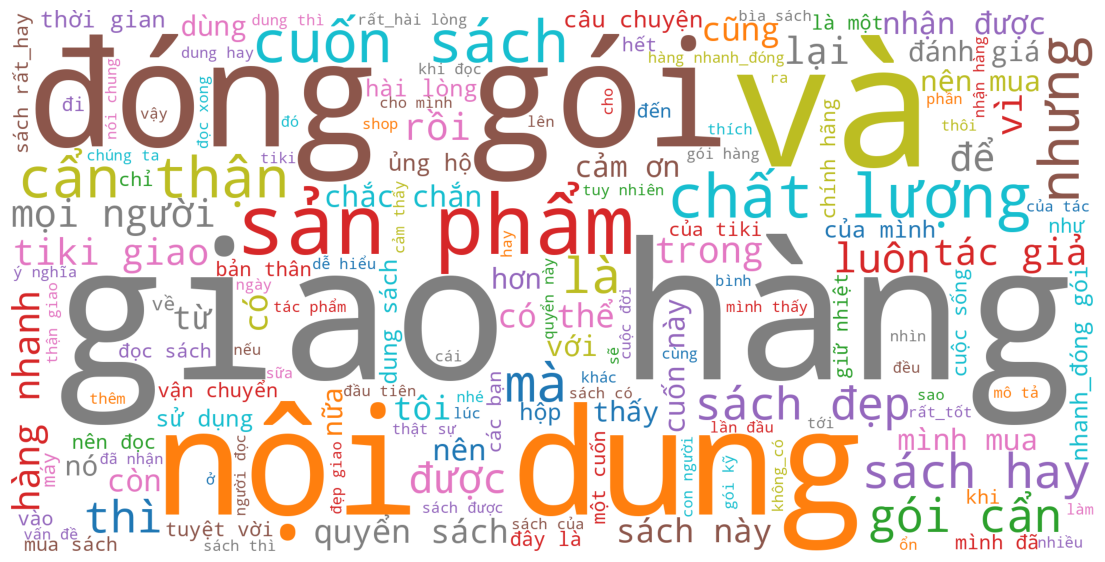

In [686]:
import nltk
from wordcloud import WordCloud
# Create bag-of-words
all_words = [token for token in df['clean_content'].tolist() if token and token != '']

corpus=' '.join(all_words)
all_words = nltk.FreqDist(all_words)

# Print the total number of words and the 15 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

plt.figure(figsize=(14, 8))
word_cloud = WordCloud(
    max_words=150,
    background_color="white",
    colormap="tab10",   # màu nổi bật hơn (có thể thử 'plasma', 'Set2', 'coolwarm')
    width=2000,
    height=1000,
    mode="RGB"
).generate(corpus)
plt.axis("off")
plt.imshow(word_cloud)

## Phân tích phân phối độ dài câu trong các đánh giá của khách hàng


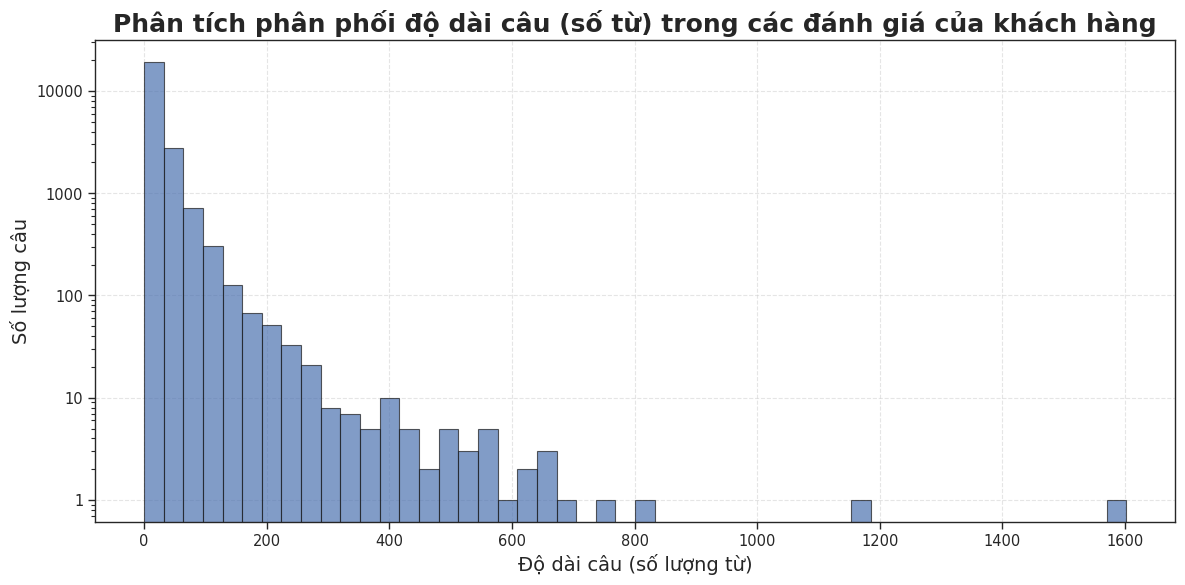

In [688]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Tính độ dài câu theo số từ
lengths = df['clean_content'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
plt.hist(lengths, bins=50, edgecolor='k', alpha=0.7)

plt.title('Phân tích phân phối độ dài câu (số từ) trong các đánh giá của khách hàng',
          fontsize=18, fontweight='bold')
plt.xlabel('Độ dài câu (số lượng từ)', fontsize=14)
plt.ylabel('Số lượng câu', fontsize=14)

# Định dạng trục y
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Phân tích dữ liệu phân bố giữa label và rating


In [690]:
!{sys.executable} -m pip install seaborn


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13732\2623464876.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], y=top_titles.index, x=top_titles.values, palette='Set2')


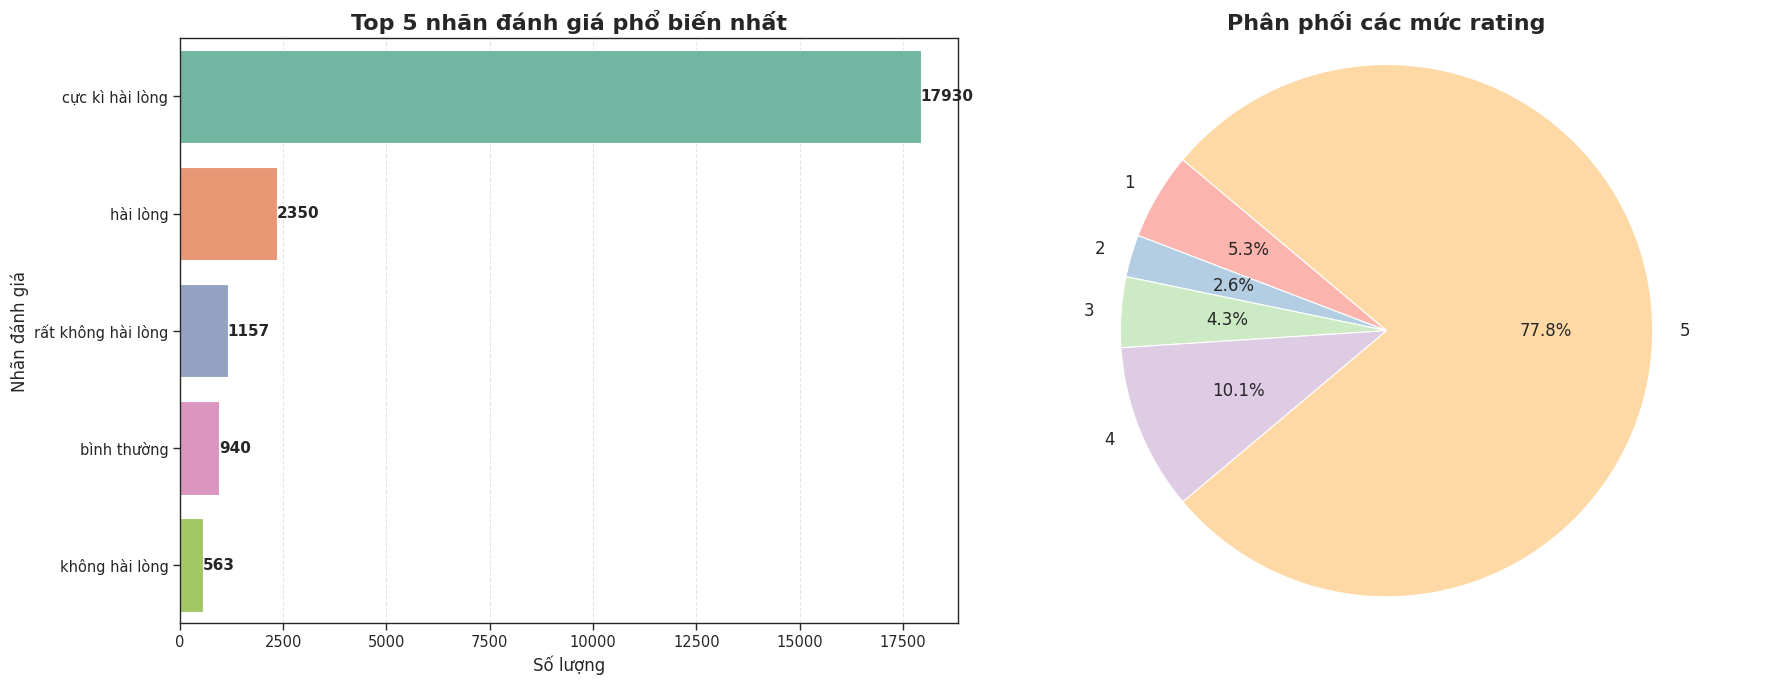

In [692]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'DejaVu Sans'

# Dữ liệu
top_titles = df['title'].value_counts().nlargest()
rating_counts = df['rating'].value_counts().sort_index()

# Tạo figure với 2 subplot nằm cạnh nhau
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Biểu đồ cột ngang ---
sns.barplot(ax=axes[0], y=top_titles.index, x=top_titles.values, palette='Set2')
axes[0].set_title('Top 5 nhãn đánh giá phổ biến nhất', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Số lượng', fontsize=12)
axes[0].set_ylabel('Nhãn đánh giá', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.5)

# Thêm annotate số lượng vào cuối mỗi cột
for i, v in enumerate(top_titles.values):
    axes[0].text(v + 0.5, i, str(v), va='center', fontsize=11, fontweight='bold')

# --- Biểu đồ tròn ---
colors = sns.color_palette('Pastel1', len(rating_counts))
axes[1].pie(
    rating_counts,
    labels=rating_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)
axes[1].set_title('Phân phối các mức rating', fontsize=16, fontweight='bold')
axes[1].axis('equal')

plt.tight_layout()
plt.show()


### Cần bằng mẫu

### Cân bằng mẫu với 3 nhãn


#### Gom thành 3 nhãn


In [694]:
def chuan_hoa_title_3(row):
    if row['rating'] in [4, 5]:
        return 'cực kỳ hài lòng'
    elif row['rating'] in [1, 2]:
        return 'không hài lòng'
    else:
        return 'trung lập/chưa đánh giá'

df['title'] = df.apply(chuan_hoa_title_3, axis=1)
print(df['title'].value_counts())


title
cực kỳ hài lòng            20547
không hài lòng              1837
trung lập/chưa đánh giá     1001
Name: count, dtype: int64


#### Trực quan dữ liệu 3 nhãn


Most common words - Cực kỳ hài lòng: [('ổn', 647), ('tốt', 375), ('sách hay', 170), ('good', 155), ('hay', 151), ('giao hàng nhanh', 111), ('sản phẩm tốt', 93), ('tuyệt vời', 75), ('sách đẹp', 72), ('hài lòng', 51), ('sản phẩm ổn', 47), ('giao hàng nhanh_đóng gói cẩn thận', 46), ('đẹp', 44), ('rất_tốt', 43), ('tot', 40)]
Most common words - Không hài lòng: [('chất lượng giấy không_tốt', 2), ('thái độ nhân viên không_tốt gọi điện lúc đêm khuya', 2), ('nhiều câu trong sách sai chính tả', 1), ('đây là cái đánh giá 1 sao đầu tiên trong đời tôi luôn tiki nên xem lại cách đóng gói quá_tệ cho âm sao được là tôi cũng đánh giá luôn ý sách không_có lấy thêm 1 lớp bọc phụ nào ngoài thùng mà thùng thì tét nát bét bìa cứng mà móp hết 4 góc dùng bookcare mà cái bọc plastic nó rách rớt ra khỏi cuốn sách bìa sách còn bị_xước mất màu khởi điểm đầu là tiki bán sách mà tôi từng rất_thích tiki nên dù nhiều đánh giá sách bị_móp tôi vẫn mua nhưng thôi từ biệt gói bookcare cũng bỏ luôn chứ bọc mà rách luôn c

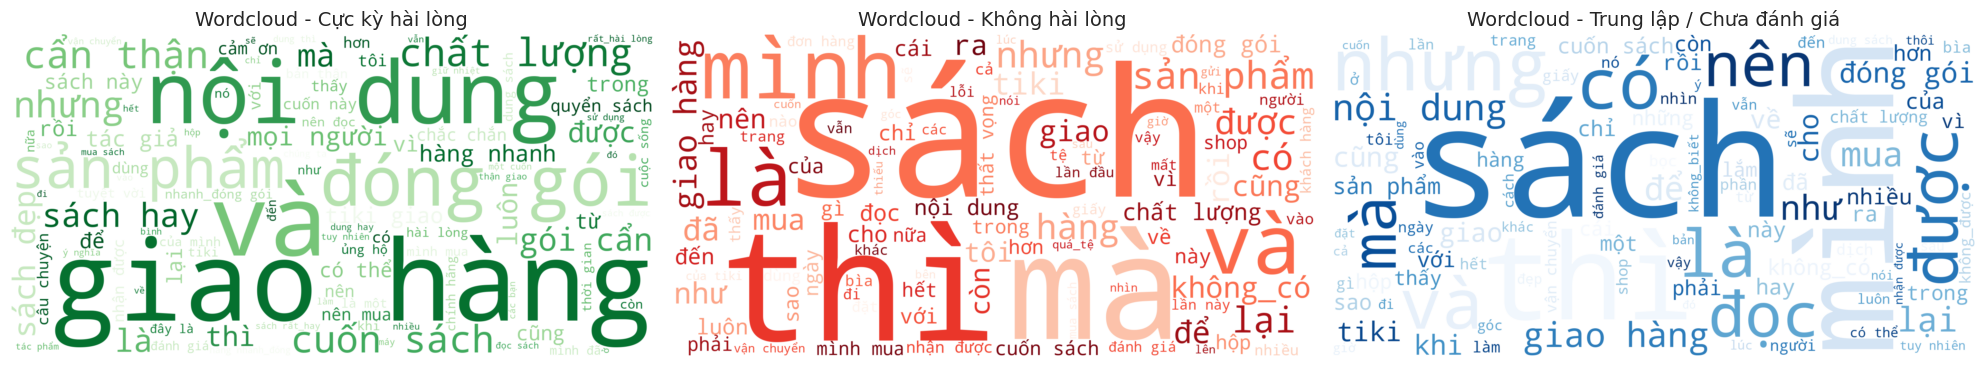

In [696]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- Hàm tiện ích ---
def get_tokens_by_label(df, label_col, label_value, text_col='clean_content'):
    """Lấy list các token theo nhãn"""
    return [token for token in df[df[label_col] == label_value][text_col].tolist() if token and token != '']

# --- Tạo token list cho từng nhóm ---
happy_words = get_tokens_by_label(df, 'title', 'cực kỳ hài lòng')
unhappy_words = get_tokens_by_label(df, 'title', 'không hài lòng')
neutral_words = get_tokens_by_label(df, 'title', 'trung lập/chưa đánh giá')

# --- Corpus ---
happy_corpus = ' '.join(happy_words)
unhappy_corpus = ' '.join(unhappy_words)
neutral_corpus = ' '.join(neutral_words)

# --- FreqDist ---
happy_freq_dist = nltk.FreqDist(happy_words)
unhappy_freq_dist = nltk.FreqDist(unhappy_words)
neutral_freq_dist = nltk.FreqDist(neutral_words)

# --- In thống kê ---
print('Most common words - Cực kỳ hài lòng:', happy_freq_dist.most_common(15))
print('Most common words - Không hài lòng:', unhappy_freq_dist.most_common(15))
print('Most common words - Trung lập/Chưa đánh giá:', neutral_freq_dist.most_common(15))

# --- Vẽ WordCloud cho cả 3 nhãn ---
plt.figure(figsize=(20, 8))

# 1. Cực kỳ hài lòng
plt.subplot(1, 3, 1)
word_cloud_happy = WordCloud(max_words=100, background_color="white", colormap="Greens", width=2000, height=1000).generate(happy_corpus)
plt.imshow(word_cloud_happy, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud - Cực kỳ hài lòng", fontsize=14)

# 2. Không hài lòng
plt.subplot(1, 3, 2)
word_cloud_unhappy = WordCloud(max_words=100, background_color="white", colormap="Reds", width=2000, height=1000).generate(unhappy_corpus)
plt.imshow(word_cloud_unhappy, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud - Không hài lòng", fontsize=14)

# 3. Trung lập / Chưa đánh giá
plt.subplot(1, 3, 3)
word_cloud_neutral = WordCloud(max_words=100, background_color="white", colormap="Blues", width=2000, height=1000).generate(neutral_corpus)
plt.imshow(word_cloud_neutral, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud - Trung lập / Chưa đánh giá", fontsize=14)

plt.tight_layout()
plt.show()


In [704]:
# Lọc các câu thuộc nhãn trung lập / bình thường
neutral_df = df[df['title'] == 'trung lập/chưa đánh giá'].copy()

# Hoặc nếu nhãn là 'bình thường'
# neutral_df = df_oversampled[df_oversampled['label'] == 'bình thường'].copy()

# Hiển thị 10 câu đầu
print(neutral_df[['clean_content', 'title']].head(20))

# Nếu muốn xem toàn bộ hoặc một range
# display(neutral_df[['clean_content', 'title']].iloc[0:20])


                                          clean_content  \
8     sách có vết mực ở nhiều trang một số trang sác...   
9     mình đã hơi_ẩu khi mua cuốn này với suy nghĩ t...   
202   not good experience because of shipper sao bad...   
456   tiki giao nhanh_đóng gói cẩn thận nhưng đọc đư...   
457   nội dung sách hay không_cần bàn cãi nhưng chất...   
471                giao hàng chậm_hơn thời gian cam kết   
472   hàng giao nhanh_đúng hẹn đóng gói cẩn thận còn...   
480         giao hành nhanh_nhưng tiki bookcare bị_rách   
671   bạn nào thích tác giả carl jung mà muốn đọc qu...   
717   trang 34 bị_in lỗi đúng phần mình đọc vào mạch...   
719   sách mình nhận ngày 26 2 2023 bị_lỗi in ngược ...   
788                    sách rất_bụi dơ đến cả phần giấy   
872   đánh giá không_tính điểm sách móp cạnh hộp đựn...   
873   đánh giá không_tính điểm sách thì ngon quá_như...   
874   đánh giá không_tính điểm sách giá trị nhưng kh...   
885   có vẻ đây là cuốn sách đã được sử dụng vì có n... 

### 2 nhãn

In [706]:

def chuan_hoa_title(row):
    if row['rating'] == 5 or row['rating'] == 4:
        return 'cực kỳ hài lòng'
    else:
        return 'không hài lòng'

df['title'] = df.apply(chuan_hoa_title, axis=1)
print(df['title'].value_counts())

title
cực kỳ hài lòng    20547
không hài lòng      2838
Name: count, dtype: int64


Number of words in Cực kỳ hài lòng: 20482
Most common words in Cực kỳ hài lòng: [('ổn', 647), ('tốt', 375), ('sách hay', 170), ('good', 155), ('hay', 151), ('giao hàng nhanh', 111), ('sản phẩm tốt', 93), ('tuyệt vời', 75), ('sách đẹp', 72), ('hài lòng', 51), ('sản phẩm ổn', 47), ('giao hàng nhanh_đóng gói cẩn thận', 46), ('đẹp', 44), ('rất_tốt', 43), ('tot', 40)]
Number of words in Không hài lòng: 2838
Most common words in Không hài lòng: [('hài lòng', 3), ('ổn', 2), ('chất lượng giấy không_tốt', 2), ('thái độ nhân viên không_tốt gọi điện lúc đêm khuya', 2), ('chất lượng sản phẩm không_tốt', 2), ('sản phẩm tốt_giao hàng nhanh chóng', 2), ('sách có vết mực ở nhiều trang một số trang sách in bị_lệch nên làm mình có trải nghiệm không_tốt', 1), ('mình đã hơi_ẩu khi mua cuốn này với suy nghĩ trí nhớ sai lầm kiểu bất cứ cuốn nào của backman cũng đều vui thú dị ôi cuốn này méo phải nó đánh vào 2 chủ đề mà mình mệt nhất một là quá_thần thánh hay cuồng một cái gì đó đặt hết hy vọng vào đấy như 

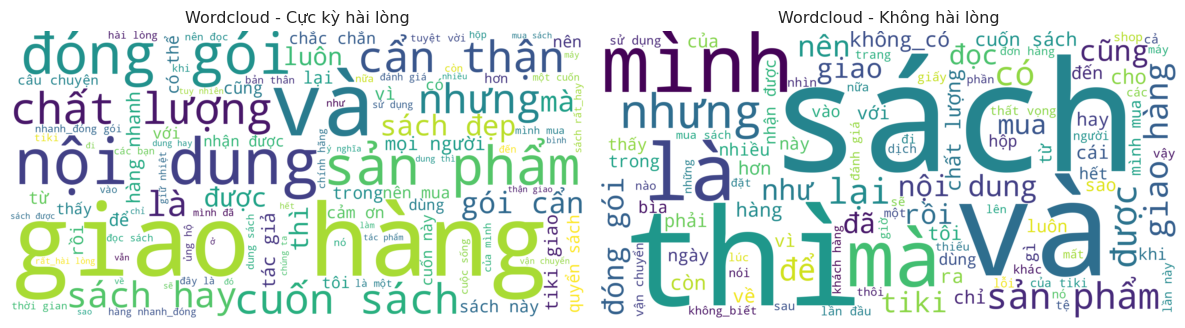

In [709]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tạo danh sách từ cho 'cực kỳ hài lòng' và 'không hài lòng'
happy_words = [token for token in df[df['title'] == 'cực kỳ hài lòng']['clean_content'].tolist() if token and token != '']
unhappy_words = [token for token in df[df['title'] == 'không hài lòng']['clean_content'].tolist() if token and token != '']

# Tạo corpus từ các từ trong từng nhóm
happy_corpus = ' '.join(happy_words)
unhappy_corpus = ' '.join(unhappy_words)

# Tạo frequency distribution cho mỗi nhóm
happy_freq_dist = nltk.FreqDist(happy_words)
unhappy_freq_dist = nltk.FreqDist(unhappy_words)

# In tổng số từ và 15 từ phổ biến nhất cho từng nhóm
print('Number of words in Cực kỳ hài lòng: {}'.format(len(happy_words)))
print('Most common words in Cực kỳ hài lòng: {}'.format(happy_freq_dist.most_common(15)))

print('Number of words in Không hài lòng: {}'.format(len(unhappy_words)))
print('Most common words in Không hài lòng: {}'.format(unhappy_freq_dist.most_common(15)))

# Vẽ wordcloud cho 'cực kỳ hài lòng'
plt.figure(figsize=(12, 8))

# Wordcloud cho nhóm 'cực kỳ hài lòng'
plt.subplot(1, 2, 1)
word_cloud_happy = WordCloud(max_words=100, background_color="white", width=2000, height=1000, mode="RGB").generate(happy_corpus)
plt.imshow(word_cloud_happy, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud - Cực kỳ hài lòng")

# Wordcloud cho nhóm 'không hài lòng'
plt.subplot(1, 2, 2)
word_cloud_unhappy = WordCloud(max_words=100, background_color="white", width=2000, height=1000, mode="RGB").generate(unhappy_corpus)
plt.imshow(word_cloud_unhappy, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud - Không hài lòng")

plt.tight_layout()
plt.show()


#### Chia đều tập dữ liệu

In [711]:
import random
import nltk
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')

# Lấy từ đồng nghĩa
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace("_", " ").lower()
            if synonym != word:
                synonyms.add(synonym)
    return list(synonyms)

# 1. Synonym Replacement
def synonym_replacement(words, n=1):
    new_words = words.copy()
    random_word_list = list(set([word for word in words if len(get_synonyms(word)) > 0]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    return new_words

# 2. Random Insertion
def random_insertion(words, n=1):
    new_words = words.copy()
    for _ in range(n):
        add_word(new_words)
    return new_words

def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1 and counter < 10:
        random_word = random.choice(new_words)
        synonyms = get_synonyms(random_word)
        counter += 1
    if len(synonyms) > 0:
        random_synonym = random.choice(synonyms)
        insert_pos = random.randint(0, len(new_words)-1)
        new_words.insert(insert_pos, random_synonym)

# 3. Random Swap
def random_swap(words, n):
    new_words = words.copy()
    if len(new_words) < 2:  # Nếu câu ngắn quá thì return luôn
        return new_words
    for _ in range(n):
        new_words = swap_word(new_words)
    return new_words


def swap_word(new_words):
    new_words = new_words.copy()
    idx1, idx2 = random.sample(range(len(new_words)), 2)
    new_words[idx1], new_words[idx2] = new_words[idx2], new_words[idx1]
    return new_words

# 4. Random Deletion
def random_deletion(words, p=0.1):
    if len(words) == 1:
        return words
    new_words = []
    for word in words:
        r = random.uniform(0,1)
        if r > p:
            new_words.append(word)
    if len(new_words) == 0:
        return [random.choice(words)]
    return new_words

# Hàm EDA tổng hợp
def eda(sentence, num_aug=4):
    words = sentence.split()
    augmented_sentences = []
    
    augmented_sentences.append(" ".join(synonym_replacement(words, n=1)))
    augmented_sentences.append(" ".join(random_insertion(words, n=1)))
    augmented_sentences.append(" ".join(random_swap(words, n=1)))
    augmented_sentences.append(" ".join(random_deletion(words, p=0.1)))
    
    return augmented_sentences[:num_aug]


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [713]:
text = "sản phẩm này rất tốt và bền"
print("Original:", text)
print("Augmented:", eda(text, num_aug=4))


Original: sản phẩm này rất tốt và bền
Augmented: ['sản phẩm này rất tốt và bền', 'sản phẩm này rất tốt và bền', 'sản phẩm này rất tốt bền và', 'sản phẩm này rất tốt và bền']


In [715]:
import pandas as pd

# Đếm số lượng mẫu mỗi nhãn
label_counts = df['title'].value_counts()
print("Phân phối ban đầu:")
print(label_counts)

# Lấy số lượng lớn nhất để cân bằng
max_count = label_counts.max()

# Hàm augment dữ liệu bằng EDA
def augment_texts(group, target_size):
    augmented_rows = []
    need = target_size - len(group)
    per_sample = max(1, need // len(group))
    
    for _, row in group.iterrows():
        augmented = eda(row['clean_content'], num_aug=per_sample)
        for text in augmented:
            augmented_rows.append({
                "clean_content": text,
                "title": row['title']
            })
        if len(augmented_rows) >= need:
            break
    return pd.DataFrame(augmented_rows)

# Sinh dữ liệu cho từng nhãn
dfs = []
for label, group in df.groupby('title'):
    if len(group) < max_count:
        aug_df = augment_texts(group, max_count)
        dfs.append(pd.concat([group, aug_df], axis=0))
    else:
        dfs.append(group)

# Ghép lại thành dataset cân bằng
df_balanced_2_label = pd.concat(dfs, axis=0)
df_balanced_2_label = df_balanced_2_label.sample(frac=1, random_state=42).reset_index(drop=True)

# Kiểm tra phân phối
print("\nPhân phối sau khi EDA:")
print(df_balanced_2_label['title'].value_counts())

# Xuất CSV
df_balanced_2_label.to_csv("df_balanced_2_label.csv", index=False)


Phân phối ban đầu:
title
cực kỳ hài lòng    20547
không hài lòng      2838
Name: count, dtype: int64

Phân phối sau khi EDA:
title
cực kỳ hài lòng    20547
không hài lòng     14190
Name: count, dtype: int64


In [717]:
import pandas as pd

# Giả sử df_balanced_2_label là kết quả sau EDA
label_counts = df_balanced_2_label['title'].value_counts()
print("Phân phối hiện tại sau EDA:")
print(label_counts)

# Xác định số lượng nhãn "không hài lòng"
minority_count = label_counts['không hài lòng']

# Lấy nhãn đông hơn "cực kỳ hài lòng" bằng số lượng nhãn ít hơn
df_majority = df_balanced_2_label[df_balanced_2_label['title'] == 'cực kỳ hài lòng'].sample(
    n=minority_count, random_state=42
)
df_minority = df_balanced_2_label[df_balanced_2_label['title'] == 'không hài lòng']

# Kết hợp 2 nhãn để cân bằng
df_final = pd.concat([df_majority, df_minority], axis=0)
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

# Kiểm tra phân phối
print("\nPhân phối cuối cùng cân bằng theo nhãn 'không hài lòng':")
print(df_final['title'].value_counts())

# Xuất CSV nếu muốn
df_final.to_csv("df_balanced_equal_2_label.csv", index=False)


Phân phối hiện tại sau EDA:
title
cực kỳ hài lòng    20547
không hài lòng     14190
Name: count, dtype: int64

Phân phối cuối cùng cân bằng theo nhãn 'không hài lòng':
title
không hài lòng     14190
cực kỳ hài lòng    14190
Name: count, dtype: int64


In [719]:
import pandas as pd
import unicodedata
import re

# 1️⃣ Đọc dữ liệu cân bằng đã lưu
df_balanced = pd.read_csv("df_balanced_equal_2_label.csv")

# 2️⃣ Hàm loại bỏ dấu tiếng Việt
def remove_diacritics(text):
    if not isinstance(text, str):
        return ''
    # Loại bỏ dấu
    text = unicodedata.normalize('NFD', text)
    text = ''.join([c for c in text if unicodedata.category(c) != 'Mn'])
    # Loại bỏ ký tự không phải chữ/số và gộp khoảng trắng
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 3️⃣ Tạo bản copy không dấu từ text gốc (content)
df_no_diacritics = df_balanced.copy()
df_no_diacritics['clean_content'] = df_no_diacritics['content'].astype(str).apply(remove_diacritics)

# 4️⃣ Ghép dữ liệu gốc + bản không dấu và trộn
df_augmented = pd.concat([df_balanced, df_no_diacritics], axis=0)\
                 .sample(frac=1, random_state=42)\
                 .reset_index(drop=True)

# 5️⃣ Kiểm tra
print("Kích thước dữ liệu gốc:", len(df_balanced))
print("Kích thước dữ liệu sau khi thêm không dấu:", len(df_augmented))
print(df_augmented.head())

# 6️⃣ Lưu ra CSV nếu muốn
df_augmented.to_csv("df_augmented_no_diacritics.csv", index=False)


Kích thước dữ liệu gốc: 28380
Kích thước dữ liệu sau khi thêm không dấu: 56760
             title                                            content  rating  \
0  cực kỳ hài lòng  giao hàng nhanh, nay mua còn éc mã 40k tiết ki...     5.0   
1  cực kỳ hài lòng  Dù phong cách viết khá lạ\nNma vì sách dày nên...     4.0   
2  cực kỳ hài lòng  Sách hay ý nghĩa. Cho ta thêm góc nhìn của 1 p...     5.0   
3   không hài lòng                                                NaN     NaN   
4  cực kỳ hài lòng  Sách hay. Thực tế và súc tích. Có thể áp dụng ...     5.0   

                                       clean_content  
0  giao hàng nhanh_nay mua còn éc mã 40 không_tiế...  
1  dù phong cách viết khá_lạ nma vì sách dày nên ...  
2  Sach hay y nghia Cho ta them goc nhin cua 1 ph...  
3  sách bị_móp méo nhìn như cũ_vậy còn bị_xước và...  
4  Sach hay Thuc te va suc tich Co the ap dung ng...  


In [767]:
print("Phân phối sau khi thêm dữ liệu không dấu:")
print(df_augmented['title'].value_counts())


Phân phối sau khi thêm dữ liệu không dấu:
title
cực kỳ hài lòng    28380
không hài lòng     28380
Name: count, dtype: int64


#### So sánh

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13732\1995427718.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=before_balance.index, y=before_balance.values, palette='Set2')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13732\1995427718.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=after_balance.index, y=after_balance.values, palette='Pastel1')


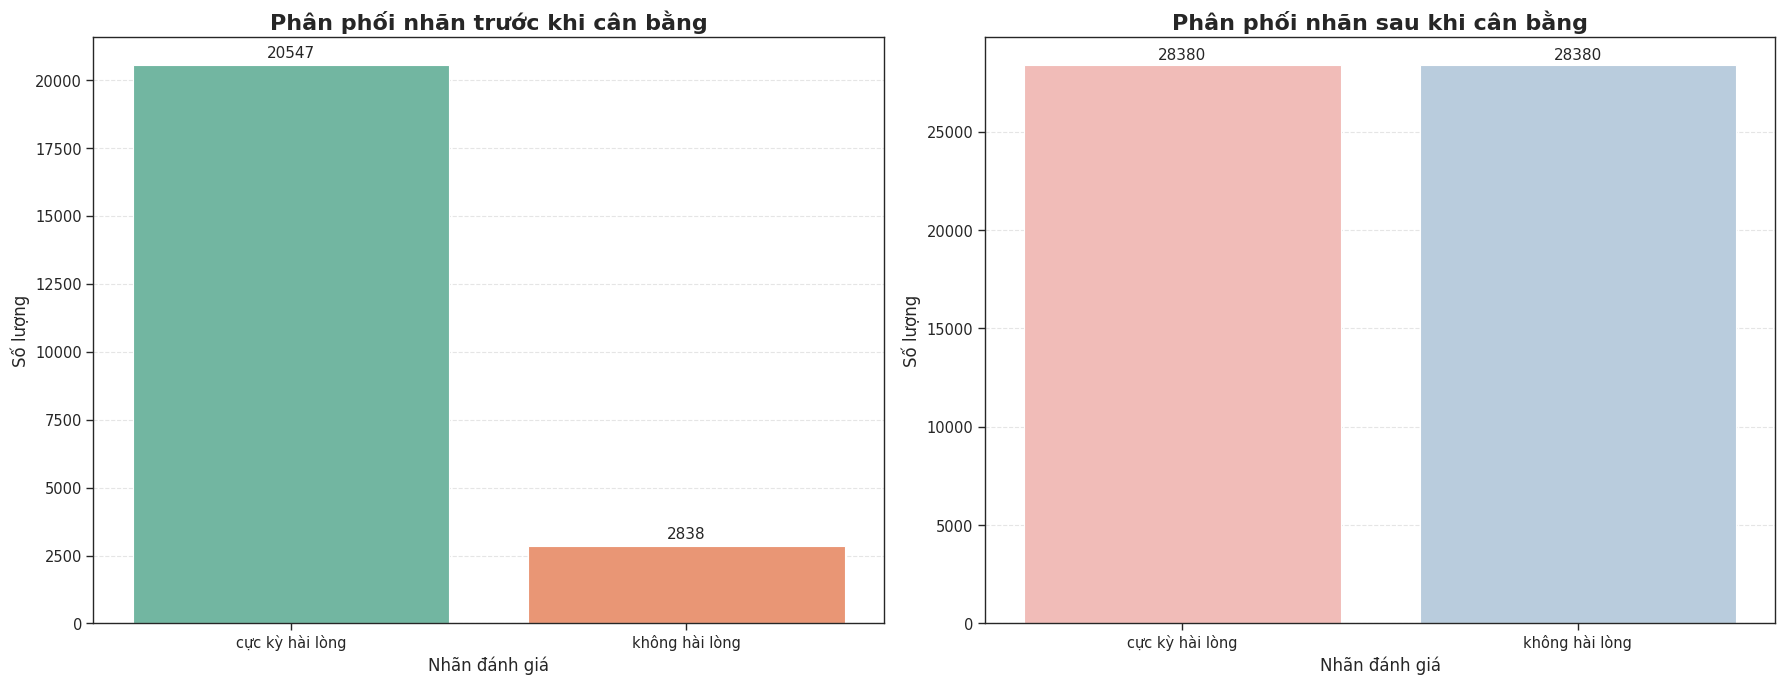

In [723]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'DejaVu Sans'

# Dữ liệu
before_balance = df['title'].value_counts().sort_index()
after_balance = df_augmented['title'].value_counts().sort_index()

# Tạo figure với 2 subplot nằm cạnh nhau
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Biểu đồ cột đứng: Trước khi cân bằng ---
sns.barplot(ax=axes[0], x=before_balance.index, y=before_balance.values, palette='Set2')
axes[0].set_title('Phân phối nhãn trước khi cân bằng', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Nhãn đánh giá', fontsize=12)
axes[0].set_ylabel('Số lượng', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Hiển thị số liệu trên cột
for i, v in enumerate(before_balance.values):
    axes[0].text(i, v + 300, str(v), ha='center', fontsize=11)

# --- Biểu đồ cột đứng: Sau khi cân bằng ---
sns.barplot(ax=axes[1], x=after_balance.index, y=after_balance.values, palette='Pastel1')
axes[1].set_title('Phân phối nhãn sau khi cân bằng', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Nhãn đánh giá', fontsize=12)
axes[1].set_ylabel('Số lượng', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Hiển thị số liệu trên cột
for i, v in enumerate(after_balance.values):
    axes[1].text(i, v + 300, str(v), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


### Chia tập dữ liệu huấn luyện và kiểm tra 80 - 20


In [725]:
from sklearn.model_selection import train_test_split

# Lọc 2 nhãn cần chia
df_2_label = df_augmented[df_augmented['title'].isin(['cực kỳ hài lòng', 'không hài lòng'])].copy()

# Kiểm tra phân phối
print("Tổng số mẫu 2 nhãn:", len(df_2_label))
print("Phân phối nhãn trước khi chia:")
print(df_2_label['title'].value_counts())

# Chia 80/20, stratify để giữ cân bằng
train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    df_2_label['clean_content'],
    df_2_label['title'],
    test_size=0.2,
    random_state=42,
    stratify=df_2_label['title']  # giữ cân bằng nhãn
)

# Kiểm tra kết quả
print("\nSố mẫu tập train:", len(train_sentences))
print("Số mẫu tập test:", len(test_sentences))

print("\nPhân phối nhãn trong tập train:")
print(train_labels.value_counts())

print("\nPhân phối nhãn trong tập test:")
print(test_labels.value_counts())


Tổng số mẫu 2 nhãn: 56760
Phân phối nhãn trước khi chia:
title
cực kỳ hài lòng    28380
không hài lòng     28380
Name: count, dtype: int64

Số mẫu tập train: 45408
Số mẫu tập test: 11352

Phân phối nhãn trong tập train:
title
không hài lòng     22704
cực kỳ hài lòng    22704
Name: count, dtype: int64

Phân phối nhãn trong tập test:
title
cực kỳ hài lòng    5676
không hài lòng     5676
Name: count, dtype: int64


### Danh sách các từ cấm

In [727]:
import re

# --- Bước 1: Load danh sách từ cấm ---
def load_bad_words(filepath="bad_words.txt"):
    with open(filepath, "r", encoding="utf-8") as f:
        bad_words = [line.strip().lower() for line in f if line.strip()]
    return bad_words

bad_words = load_bad_words("bad_words.txt")

# --- Bước 2: Kiểm tra vi phạm ---
def get_violations(comment, bad_words):
    comment_lower = comment.lower()
    violations = []
    for word in bad_words:
        if re.search(rf"\b{re.escape(word)}\b", comment_lower):
            violations.append(word)
    return violations

# --- Bước 3: Hàm dự đoán cuối ---
def process_comment(comment, model, vectorizer, bad_words):
    violations = get_violations(comment, bad_words)
    if violations:
        return f"Bình luận chứa từ khóa không hợp lệ: {', '.join(violations)}"
    else:
        X = vectorizer.transform([comment])
        prediction = model.predict(X)[0]
        return prediction


## Text Feature


### Trích xuất đặc trưng cho Machine Learning.
#### CountVectorizer (scikit-learn)
##### Mục tiêu:
##### Biểu diễn câu thành vector đặc trưng theo dạng

* Bag-of-Words: đếm số lần mỗi từ xuất hiện trong câu.
* Vị trí từ: Không quan tâm
* Phù hợp: Machine
* Đầu ra: Ma trận đếm từ

In [733]:
from sklearn.feature_extraction.text import CountVectorizer

# Loại bỏ NaN
train_sentences = train_sentences.dropna()
test_sentences = test_sentences.dropna()

# Nếu muốn giữ nhãn tương ứng, cũng lọc theo index
train_labels = train_labels[train_sentences.index]
test_labels = test_labels[test_sentences.index]

# Khởi tạo vectorizer
vectorizer_2 = CountVectorizer()

# Fit và transform
X_train_2_label = vectorizer_2.fit_transform(train_sentences)
X_test_2_label = vectorizer_2.transform(test_sentences)

Y_train_2_label = train_labels
Y_test_2_label = test_labels

print("X_train shape:", X_train_2_label.shape)
print("X_test shape:", X_test_2_label.shape)


X_train shape: (45376, 13241)
X_test shape: (11340, 13241)


## TF-IDF (Term Frequency - Inverse Document Frequency)

### Giới thiệu:
TF-IDF là phương pháp biểu diễn văn bản dựa trên tần suất xuất hiện của từ trong câu (TF) và tần suất ngược của từ trong toàn bộ tập dữ liệu (IDF).

* **Vị trí từ**: không quan tâm.
* **Phù hợp**: Phân loại văn bản, tìm kiếm thông tin.
* **Đầu ra**: Ma trận đặc trưng, trong đó mỗi cột là trọng số của từ dựa trên TF 

Tần suất xuất hiện từ (TF): từ nào xuất hiện nhiều thì quan trọng hơn.

IDF: nhưng nếu từ xuất hiện ở mọi văn bản thì nó ít quan trọng (vd: "sản phẩm", "mua").

Kết hợp TF và IDF → mô hình tập trung vào những từ đặc trưng, phân biệt nhãn.
và IDF.
TF và IDF.


In [743]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Khởi tạo TF-IDF vectorizer
vectorizer_2_tfidf = TfidfVectorizer()

# Fit trên tập train và transform cả train + test
X_train_2_label = vectorizer_2_tfidf.fit_transform(train_sentences)
X_test_2_label = vectorizer_2_tfidf.transform(test_sentences)

# Giữ nhãn tương ứng
Y_train_2_label = train_labels
Y_test_2_label = test_labels

print("X_train shape:", X_train_2_label.shape)
print("X_test shape:", X_test_2_label.shape)


X_train shape: (45376, 13241)
X_test shape: (11340, 13241)


In [745]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Tập câu mẫu
sentences = [
    "Sản phẩm này rất tốt",
    "Sản phẩm tốt",
    "Dịch vụ chưa hài lòng",
    "Sản phẩm rất tốt và dịch vụ tốt"
]

# --- CountVectorizer ---
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(sentences)
df_count = pd.DataFrame(X_count.toarray(), columns=count_vect.get_feature_names_out())
print("=== CountVectorizer ===")
print(df_count)

# --- TfidfVectorizer ---
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(sentences)
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
print("\n=== TfidfVectorizer ===")
print(df_tfidf)


=== CountVectorizer ===
   chưa  dịch  hài  lòng  này  phẩm  rất  sản  tốt  và  vụ
0     0     0    0     0    1     1    1    1    1   0   0
1     0     0    0     0    0     1    0    1    1   0   0
2     1     1    1     1    0     0    0    0    0   0   1
3     0     1    0     0    0     1    1    1    2   1   1

=== TfidfVectorizer ===
       chưa      dịch       hài      lòng       này      phẩm       rất  \
0  0.000000  0.000000  0.000000  0.000000  0.592992  0.378499  0.467522   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.577350  0.000000   
2  0.485461  0.382743  0.485461  0.485461  0.000000  0.000000  0.000000   
3  0.000000  0.342166  0.000000  0.000000  0.000000  0.277013  0.342166   

        sản       tốt        và        vụ  
0  0.378499  0.378499  0.000000  0.000000  
1  0.577350  0.577350  0.000000  0.000000  
2  0.000000  0.000000  0.000000  0.382743  
3  0.277013  0.554026  0.433994  0.342166  


## Machine Learning model
### Huấn luyện mô hình

In [747]:
pip install --upgrade numpy scipy scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [751]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

def train_and_evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name="Mô hình", label_type=""):
    # Huấn luyện
    model.fit(X_train, Y_train)

    # Dự đoán
    Y_pred = model.predict(X_test)

    # Lấy tất cả nhãn xuất hiện
    labels = sorted(list(set(Y_train) | set(Y_test)))

    # Đánh giá
    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred, average='weighted')
    rec = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    cm = confusion_matrix(Y_test, Y_pred)

    # In kết quả
    print(f"\n ===== {model_name.upper()} ({label_type}) =====")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(Y_test, Y_pred))
    print("Confusion Matrix:\n", cm)

    # Trả kết quả thống kê để vẽ biểu đồ
    return {
        "model": model,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "confusion_matrix": cm
    }


### Hàm trực quan so sánh kết quả mô hình


In [753]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def def_truc_quan_mo_rong(ket_qua_dict, label_type="", Y_test=None):
    # Sắp xếp mô hình theo accuracy giảm dần
    sorted_models = sorted(ket_qua_dict.items(), key=lambda x: x[1]['accuracy'], reverse=True)

    models = [model for model, _ in sorted_models]
    accuracy = [ket_qua_dict[model]['accuracy'] for model in models]
    precision = [ket_qua_dict[model]['precision'] for model in models]
    recall = [ket_qua_dict[model]['recall'] for model in models]
    f1 = [ket_qua_dict[model]['f1'] for model in models]

    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

    # 🎨 Màu pastel nhẹ dịu
    colors = sns.color_palette("Set2", len(metrics))

    # Vẽ biểu đồ cột nhóm
    x = np.arange(len(models))
    width = 0.2

    plt.figure(figsize=(10, 6))
    for i, (metric, values) in enumerate(metrics.items()):
        plt.bar(x + i * width, values, width,
                label=metric,
                color=colors[i % len(colors)],
                edgecolor="white")

        # Hiển thị giá trị trên cột
        for xi, val in zip(x + i * width, values):
            plt.text(xi, val + 0.01, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

    plt.xticks(x + width * 1.5, models, fontsize=11, fontweight="bold")
    plt.ylim(0, 1.1)
    plt.ylabel("Score", fontsize=12)
    plt.title(f"So sánh các mô hình ({label_type})", fontsize=15, fontweight="bold")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Nếu có Y_test thì lấy tên nhãn
    if Y_test is not None:
        label_names = np.unique(Y_test)

    # 🎨 Ma trận nhầm lẫn đẹp hơn
    for model in models:
        if 'confusion_matrix' in ket_qua_dict[model]:
            cm = ket_qua_dict[model]['confusion_matrix']
            plt.figure(figsize=(7, 6))  # 👉 hình ảnh to hơn
            sns.heatmap(cm, annot=True, fmt='d',
                        cmap='Blues',   # 👉 màu xanh gradient đẹp
                        xticklabels=label_names,
                        yticklabels=label_names,
                        cbar=True, square=True,
                        annot_kws={"size": 12, "weight": "bold"})  # chữ to rõ
            plt.title(f'Confusion Matrix - {model} ({label_type})', fontsize=15, fontweight="bold")
            plt.xlabel('Dự đoán', fontsize=13)
            plt.ylabel('Thực tế', fontsize=13)
            plt.xticks(fontsize=12, rotation=30)
            plt.yticks(fontsize=12, rotation=0)
            plt.tight_layout()
            plt.show()


### Thực hiện và so sánh mô hình



 ===== NAIVE BAYES (2 nhãn) =====
Accuracy: 0.8731922398589065
Classification Report:
                  precision    recall  f1-score   support

cực kỳ hài lòng       0.88      0.87      0.87      5664
 không hài lòng       0.87      0.88      0.87      5676

       accuracy                           0.87     11340
      macro avg       0.87      0.87      0.87     11340
   weighted avg       0.87      0.87      0.87     11340

Confusion Matrix:
 [[4921  743]
 [ 695 4981]]

 ===== RANDOM FOREST (2 nhãn) =====
Accuracy: 0.9426807760141094
Classification Report:
                  precision    recall  f1-score   support

cực kỳ hài lòng       0.92      0.97      0.94      5664
 không hài lòng       0.97      0.91      0.94      5676

       accuracy                           0.94     11340
      macro avg       0.94      0.94      0.94     11340
   weighted avg       0.94      0.94      0.94     11340

Confusion Matrix:
 [[5521  143]
 [ 507 5169]]

 ===== LOGISTIC REGRESSION (2 nhãn) ===

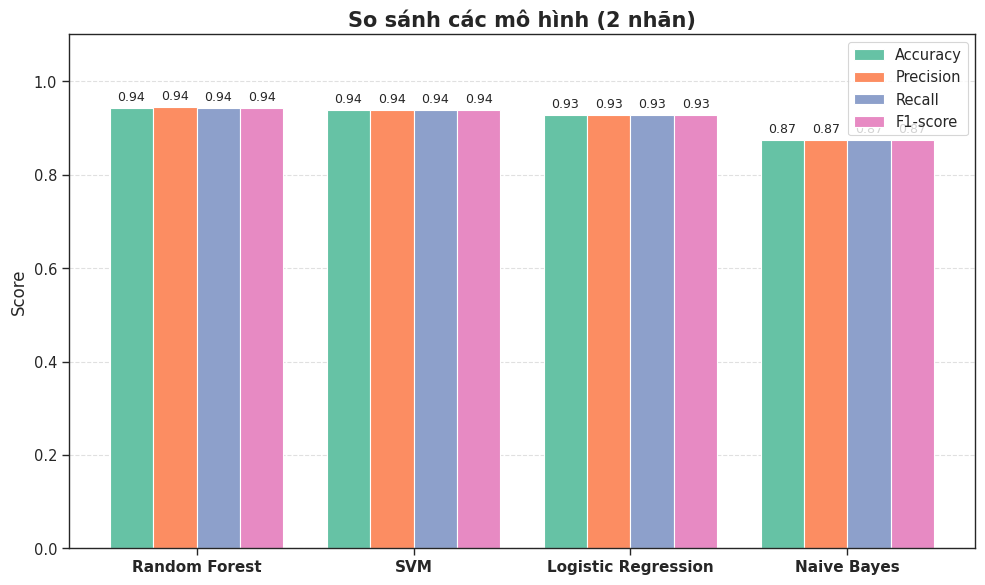

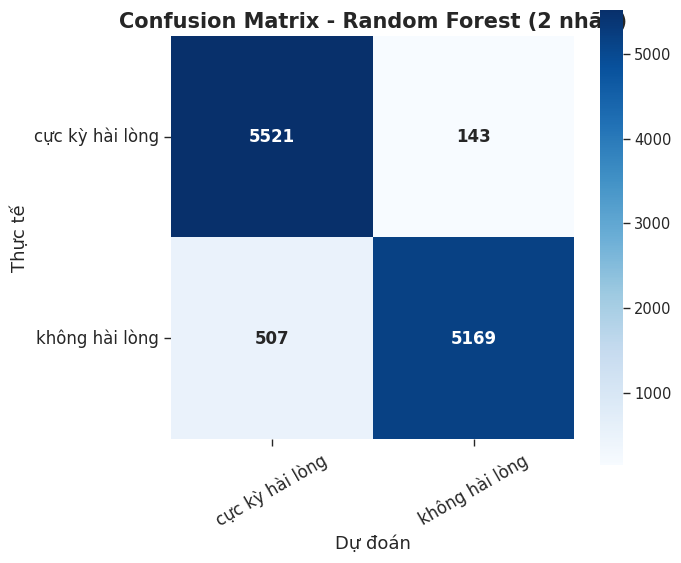

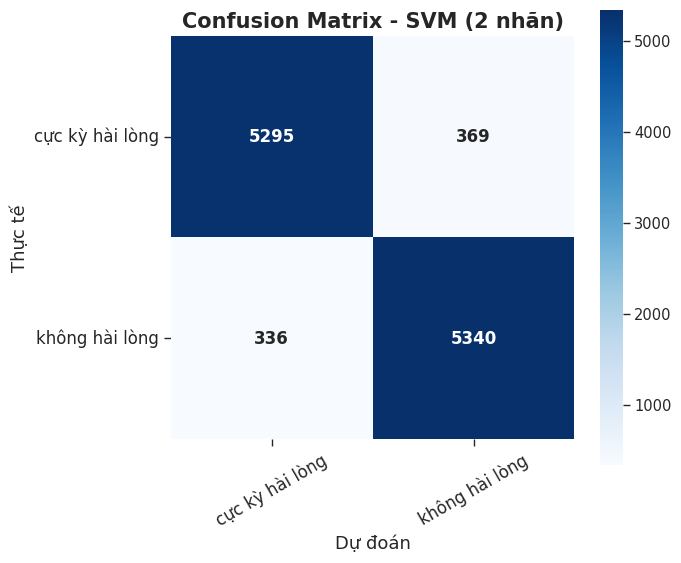

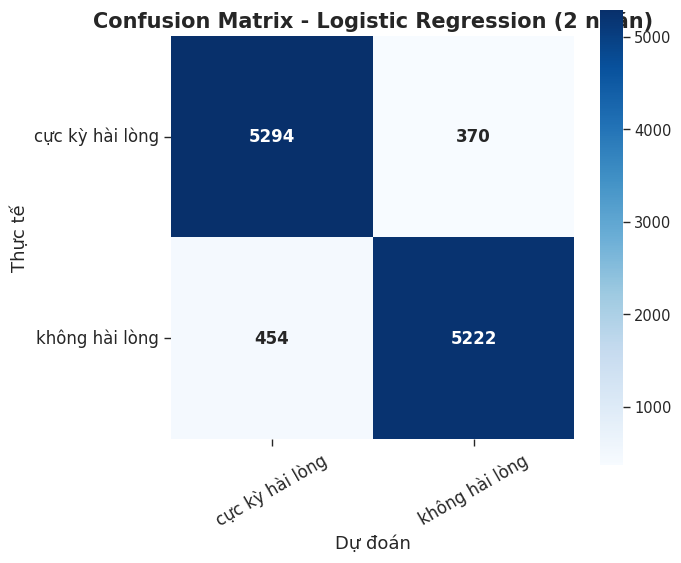

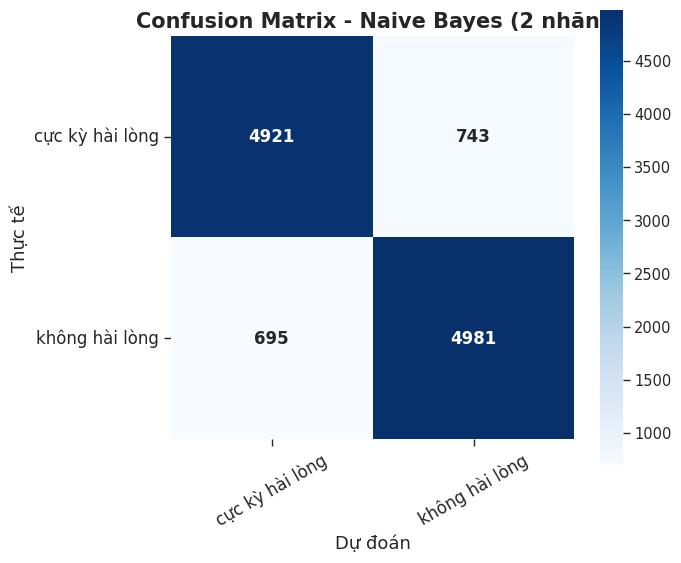

In [755]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# ======================
# Huấn luyện & đánh giá 2 nhãn
# ======================

# Naive Bayes
result_nb_2 = train_and_evaluate_model(
    MultinomialNB(),
    X_train_2_label,
    Y_train_2_label,
    X_test_2_label,
    Y_test_2_label,
    model_name="Naive Bayes",
    label_type="2 nhãn"
)

# Random Forest
result_rf_2 = train_and_evaluate_model(
    RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    X_train_2_label,
    Y_train_2_label,
    X_test_2_label,
    Y_test_2_label,
    model_name="Random Forest",
    label_type="2 nhãn"
)

# Logistic Regression
result_lr_2 = train_and_evaluate_model(
    LogisticRegression(max_iter=1000, solver="lbfgs", random_state=42),
    X_train_2_label,
    Y_train_2_label,
    X_test_2_label,
    Y_test_2_label,
    model_name="Logistic Regression",
    label_type="2 nhãn"
)

# SVM
result_svm_2 = train_and_evaluate_model(
    SVC(kernel='linear', probability=True, random_state=42),
    X_train_2_label,
    Y_train_2_label,
    X_test_2_label,
    Y_test_2_label,
    model_name="SVM",
    label_type="2 nhãn"
)

# ======================
# Gom kết quả và trực quan hóa
# ======================
ket_qua_2_nhan = {
    "Naive Bayes": result_nb_2,
    "Random Forest": result_rf_2,
    "Logistic Regression": result_lr_2,
    "SVM": result_svm_2
}

# Vẽ biểu đồ so sánh và ma trận nhầm lẫn
def_truc_quan_mo_rong(ket_qua_2_nhan, label_type="2 nhãn", Y_test=Y_test_2_label)


In [757]:
import re

# --- Hàm kiểm tra từ bị cấm ---
def get_violations(comment, bad_words):
    comment_lower = comment.lower()
    violations = []
    for word in bad_words:
        if re.search(rf"\b{re.escape(word)}\b", comment_lower):
            violations.append(word)
    return violations

# --- Hàm dự đoán cuối cùng ---
def process_comment_2_label(comment, model, vectorizer, bad_words):
    # 1. Kiểm tra từ bị cấm
    violations = get_violations(comment, bad_words)
    if violations:
        return f"❌ Bình luận chứa từ cấm: {', '.join(violations)}"

    # 2. Kiểm tra đầu vào rỗng
    if not comment.strip():
        return "⚠️ Bình luận trống!"

    # 3. Vector hóa và dự đoán
    X = vectorizer.transform([comment])
    prediction = model.predict(X)[0]
    return f"✅ Dự đoán: {prediction}"

# --- Danh sách test ---
test_comments = [
    "Sản phẩm này rất tuyệt vời, tôi cực kỳ hài lòng!",  # khen
    "Chất lượng quá tệ, không đáng tiền.",              # chê
    "Cũng bình thường thôi, không có gì đặc biệt.",     # trung lập
    "Đồ này ngu vãi, không bao giờ mua lại nữa.",       # có từ cấm
    "sản phẩm quá đắt so với giá tiền, thật thất vọng",
    "tôi sẽ quay lại đánh giá sau",
]

# --- Chạy test trên tất cả mô hình 2 nhãn ---
def test_all_models_2_label(models_dict, vectorizer, bad_words):
    for model_name, model_info in models_dict.items():
        print(f"\n===== Test với mô hình {model_name} (2 nhãn) =====")
        for comment in test_comments:
            result = process_comment_2_label(comment, model_info['model'], vectorizer, bad_words)
            print(f"👉 Input: {comment}\n   Output: {result}")

# --- Gọi test ---
test_all_models_2_label(ket_qua_2_nhan, vectorizer_2_tfidf, bad_words)



===== Test với mô hình Naive Bayes (2 nhãn) =====
👉 Input: Sản phẩm này rất tuyệt vời, tôi cực kỳ hài lòng!
   Output: ✅ Dự đoán: cực kỳ hài lòng
👉 Input: Chất lượng quá tệ, không đáng tiền.
   Output: ✅ Dự đoán: không hài lòng
👉 Input: Cũng bình thường thôi, không có gì đặc biệt.
   Output: ✅ Dự đoán: không hài lòng
👉 Input: Đồ này ngu vãi, không bao giờ mua lại nữa.
   Output: ❌ Bình luận chứa từ cấm: vãi, ngu
👉 Input: sản phẩm quá đắt so với giá tiền, thật thất vọng
   Output: ✅ Dự đoán: không hài lòng
👉 Input: tôi sẽ quay lại đánh giá sau
   Output: ✅ Dự đoán: không hài lòng

===== Test với mô hình Random Forest (2 nhãn) =====
👉 Input: Sản phẩm này rất tuyệt vời, tôi cực kỳ hài lòng!
   Output: ✅ Dự đoán: cực kỳ hài lòng
👉 Input: Chất lượng quá tệ, không đáng tiền.
   Output: ✅ Dự đoán: không hài lòng
👉 Input: Cũng bình thường thôi, không có gì đặc biệt.
   Output: ✅ Dự đoán: không hài lòng
👉 Input: Đồ này ngu vãi, không bao giờ mua lại nữa.
   Output: ❌ Bình luận chứa từ cấm: vãi

### Kết luận

### Lưu mô hình dự đoán để triển khai trên Streamlit


In [759]:
import joblib

# Lưu mô hình Logistic Regression
joblib.dump(result_lr_2['model'], 'lr_model_2label.pkl')


['lr_model_2label.pkl']

In [761]:
joblib.dump(vectorizer_2_tfidf, 'vectorizer_2label.pkl')


['vectorizer_2label.pkl']

In [769]:
joblib.dump(vectorizer_2, 'count_2label.pkl')


['count_2label.pkl']